In [1]:
import torch

from torch import nn
from torch import optim

import torch.nn.functional as F

from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import os
import re

In [2]:
root = "PROSTATEx"
l = os.walk(root)
folders_list = [x[0] for x in os.walk(root)]
t2sag_folders = [x for x in folders_list if re.search('t2tsetra',x) ]

In [8]:
folders_list = [x[0] for x in os.walk(root)]

In [9]:
t2sag_folders = [x for x in folders_list if re.search('t2tsetra',x) ]

In [10]:
t2sag_folders

['PROSTATEx/ProstateX-0290/03-01-2011-MC prostaat kliniek detectie-mc MCPROSKL30-54312/6.000000-t2tsetra-17278',
 'PROSTATEx/ProstateX-0290/03-01-2011-MC prostaat kliniek detectie-mc MCPROSKL30-54312/10.000000-t2tsetra-14268',
 'PROSTATEx/ProstateX-0333/04-10-2011-MR prostaat kanker detectie NDmc MCAPRODETN-92300/5.000000-t2tsetra-86402',
 'PROSTATEx/ProstateX-0284/02-26-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-85653/5.000000-t2tsetra-65403',
 'PROSTATEx/ProstateX-0087/12-25-2011-MC prostaat kliniek detectie-mc MCPROSKL30-61891/4.000000-t2tsetra-46289',
 'PROSTATEx/ProstateX-0086/12-19-2011-MC prostaat kliniek detectie-mc MCPROSKL30-69599/4.000000-t2tsetra-82393',
 'PROSTATEx/ProstateX-0334/04-16-2011-MR prostaat kanker detectiemc MCAPRODET-89274/4.000000-t2tsetra-04037',
 'PROSTATEx/ProstateX-0037/11-03-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-19656/4.000000-t2tsetra-89375',
 'PROSTATEx/ProstateX-0273/12-14-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-92767/4.00

In [11]:
len(t2sag_folders)

431

In [12]:
pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pylab

ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 8.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 5.9 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pydicom as pyd
import pylab
import pandas as pd

/tmp/ipykernel_73555/171486691.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:/Users/akifg/Desktop/testing/lesions\P0000009.dcm


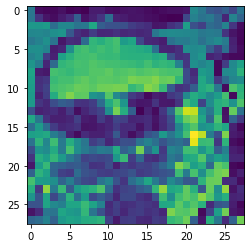

C:/Users/akifg/Desktop/testing/lesions\P1000010.dcm


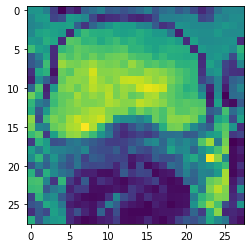

C:/Users/akifg/Desktop/testing/lesions\P10000010.dcm


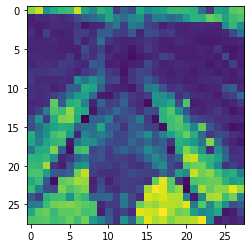

C:/Users/akifg/Desktop/testing/lesions\P2000010.dcm


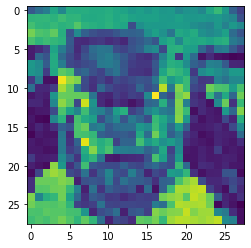

C:/Users/akifg/Desktop/testing/lesions\P2000012.dcm


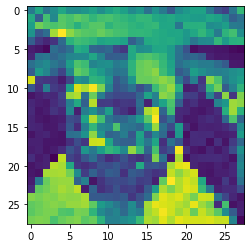

C:/Users/akifg/Desktop/testing/lesions\P3000012.dcm


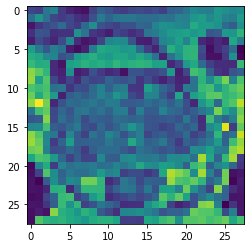

C:/Users/akifg/Desktop/testing/lesions\P3000017.dcm


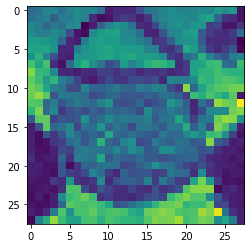

C:/Users/akifg/Desktop/testing/lesions\P4000007.dcm


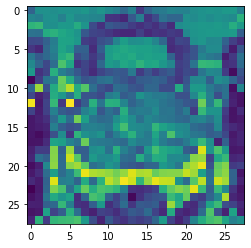

C:/Users/akifg/Desktop/testing/lesions\P5000010.dcm


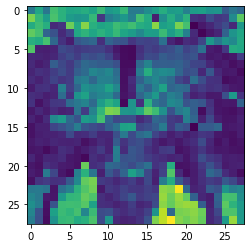

C:/Users/akifg/Desktop/testing/lesions\P6000011.dcm


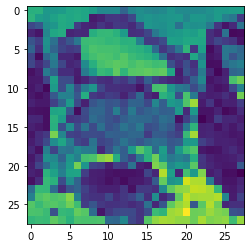

C:/Users/akifg/Desktop/testing/lesions\P6000015.dcm


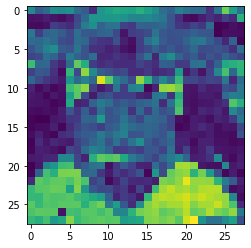

C:/Users/akifg/Desktop/testing/lesions\P7000009.dcm


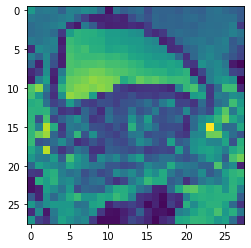

C:/Users/akifg/Desktop/testing/lesions\P8000012.dcm


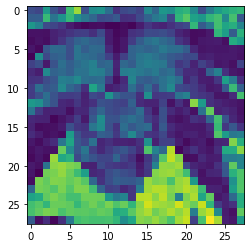

C:/Users/akifg/Desktop/testing/lesions\P9000014.dcm


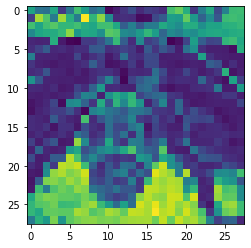

In [66]:
import csv
import pydicom as pyd
import pylab
import pandas as pd

real_lab = pd.read_csv( 'ProstateX-Images-Train.csv') 
import os
import re
root = "C:/Users/akifg/Desktop/testing/lesions"
#print(l)
l = os.walk(root)
t2sag_folders = [x[0] for x in os.walk(root)]
#t2sag_folders = [x for x in folders_list if re.search('t2tsetra',x) ]
#print(t2sag_folders)

labels = []
images = []
j = 0


for k in range(len(t2sag_folders)):
    #print(t2sag_folders[k])
    for filename in os.listdir(t2sag_folders[k]):
        if "dcm" in filename:
            print(t2sag_folders[k]+filename)
       # print(os.path.join(sub_imgs_folders[0], img_files[k]))
            ds=pyd.read_file(os.path.join(t2sag_folders[k], filename))#creating npy img_path array
        
        
            img_tp = ds.pixel_array

            h=150
            w=150



            x = int(384/2) - w/2
            y = int(384/2) - h/2

            crop_img = img_tp[50:300, 100:300]

            im1 = cv2.resize(crop_img,(28,28))

            plt.imshow(im1)
            plt.show()

        #gary2rgb = cv2.cvtColor(im1,cv2.COLOR_GRAY2RGB)
        #im2 = np.transpose(im1, (2,0, 1))
            images.append(im1) 
            labels.append(1)
        
        #if str(k) in ijk_k:
         #   labels.append(1)
        #else:
        #    labels.append(0)
    j+= len(labels_csv)

labels = np.array(labels)
images = np.array(images)
np.save('D:/PROSTAT/TRAS/t2tras_imgs_test.npy', images)
np.save('D:/PROSTAT/TRAS/t2tras_lbls_test.npy', labels) 

In [ ]:
real_lab.head()

In [ ]:
t2_sag_lab= real_lab[(real_lab['Name'] == 'P')]

In [ ]:
import csv
import pydicom as pyd
import pylab
import pandas as pd
#label selecting
#with open('C:/Users/Akif/Desktop/ProstateX-Images-Train.csv', 'r') as file:
real_lab   = pd.read_csv( 'C:/Users/akifg/ProstateX-Images-Train.csv') 
t2_sag_lab = real_lab[(real_lab['Name'] == 't2_tse_tra0')]

import os
import re
#images selection
root = "D:\PROSTAT\PROSTATEx"
#l = os.walk(root)
c = [x[0] for x in os.walk(root)]
t2sag_imgs_folders = [x for x in folders_list if re.search('t2tsetra',x) ]


      

In [ ]:
t2_sag_lab

In [ ]:
pip install opencv-python

In [ ]:
#MAIN WORK
import cv2
import pylab
import pandas as pd

labels = []
images = []
j = 0
while j < len(t2_sag_lab):
    #if t2_sag_lab.iloc[i,0] in t2sec_imgs_folders[i]
    #same patients
    #labels_csv = t2_sag_lab[(t2_sag_lab['ProxID'] == t2_sag_lab.iloc[j,0])]
    #get k's
    #ijk_k = [labels_csv.iloc[k,5].split()[2] for k in range(len(labels_csv))]
    #bridge connection
    sub_imgs_folders = [x for x in t2sag_imgs_folders if re.search(t2_sag_lab.iloc[j,0],x)]
    img_files = os.listdir(sub_imgs_folders[0])# list of file names of patient j
    for k in range(len(img_files)):
        print(os.path.join(sub_imgs_folders[0], img_files[k]))
        ds=pyd.read_file(os.path.join(sub_imgs_folders[0], img_files[k]))#creating npy img_path array
        
        
        img_tp = ds.pixel_array
        
        h=150
        w=150
        


        x = int(384/2) - w/2
        y = int(384/2) - h/2

        crop_img = img_tp[50:300, 100:300]
        
        im1 = cv2.resize(crop_img,(28,28))
        
        plt.imshow(im1)
        plt.show()

        #gary2rgb = cv2.cvtColor(im1,cv2.COLOR_GRAY2RGB)
        #im2 = np.transpose(im1, (2,0, 1))
        images.append(im1) 
        labels.append(1)
        
        #if str(k) in ijk_k:
         #   labels.append(1)
        #else:
        #    labels.append(0)
    j+= len(labels_csv)

labels = np.array(labels)
images = np.array(images)

np.save('D:/PROSTAT/TRAS/t2tras_imgs_test.npy', images)
np.save('D:/PROSTAT/TRAS/t2tras_lbls_test.npy', labels) 

In [10]:
images = np.load('D:/PROSTAT/t2data/t2_images.npy')
labels = np.load('D:/PROSTAT/t2data/t2_lbls.npy')

In [11]:
np.shape(images)

(11204, 28, 28)

In [12]:
np.shape(images)

(11204, 28, 28)

In [15]:
imaged = np.load('D:/PROSTAT/t2sag/t2sag_imgs.npy')
labeld = np.load('D:/PROSTAT/t2sag/t2sag_lbls.npy')

In [14]:
np.shape(imaged)

(3902, 3, 224, 224)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
data = imaged
labels = labeld

# Split data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# Define dataset class
class ProstateDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = self.transform(x)
            
        return x, y

# Define data transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create train and test datasets
train_dataset = ProstateDataset(train_data, train_labels, transform=transform)
test_dataset = ProstateDataset(test_data, test_labels, transform=transform)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define neural network model
class ProstateModel(nn.Module):
    def __init__(self):
        super(ProstateModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [17]:
# Define device and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ProstateModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
            
# Test model
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy: %.2f %%' % (100 * correct / total))

TypeError: can't convert np.ndarray of type numpy.uint16. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
import os
import re
import cv2

In [ ]:
#im1 = cv2.resize(images,(28,28))

In [ ]:
import cv2

width = 28
height = 28
im1 = np.zeros((len(images), width, height))

for idx in range(len(images)):
    img = images[idx, :, :]
    img_sm = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
    im1[idx, :, :] = img_sm

In [ ]:
np.shape(im1)

In [ ]:
np.save('D:/PROSTAT/adc1/X_train.npy', im1)
np.save('D:/PROSTAT/adc1/Y_train.npy', labels) 

In [75]:
images1 = np.load('D:/PROSTAT/adc1/X_train.npy')
labels1 = np.load('D:/PROSTAT/adc1/Y_train.npy')

In [76]:
np.shape(images1)

(218, 28, 28)